<a href="https://colab.research.google.com/github/Erike-Simon/CESAR-AED/blob/main/ProcDados_dask_movies_erike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Configurações iniciais

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# "dask[dataframe]": Especifica que a biblioteca Dask deve ser instalada com o suporte adicional para manipulação de DataFrames.
!pip install --upgrade "dask[dataframe]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.9 MB/s eta 0:00:00
  Attempting uninstall: dask
    Found existing installation: dask 2023.8.1
    Uninstalling dask-2023.8.1:
      Successfully uninstalled dask-2023.8.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
distributed 2023.8.1 requires dask==2023.8.1, but you have dask 2024.1.0 which is incompatible.


**Dask** é uma biblioteca para computação paralela em Python. Ele é especialmente útil para lidar com **grandes conjuntos de dados** que não cabem na memória do computador, permitindo operações distribuídas.

In [ ]:
# "dask[distributed]": Especifica que a biblioteca Dask deve ser instalada com suporte adicional para computação distribuída.
!pip install --upgrade "dask[distributed]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.4 MB/s eta 0:00:00
  Attempting uninstall: distributed
    Found existing installation: distributed 2023.8.1
    Uninstalling distributed-2023.8.1:
      Successfully uninstalled distributed-2023.8.1


**Dask Distributed** é uma extensão da biblioteca Dask que permite escalabilidade em clusters de computadores para realizar tarefas paralelas distribuídas.

In [ ]:
# pyarrow: É uma biblioteca que fornece suporte para operações eficientes com dados tabulares,
# especialmente utilizada para integração entre diferentes ferramentas e formatos de armazenamento, como o Apache Parquet.
!pip install --upgrade pyarrow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 13.0 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 10.0.1
    Uninstalling pyarrow-10.0.1:
      Successfully uninstalled pyarrow-10.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ibis-framework 7.1.0 requires pyarrow<15,>=2, but you have pyarrow 15.0.0 which is incompatible.


**PyArrow** é uma biblioteca que fornece uma ponte entre o **pandas** e o **Apache Arrow**, permitindo a conversão eficiente entre estruturas de dados pandas e Arrow. É amplamente utilizado em operações de ETL (Extract, Transform, Load) e análise de dados.

OBS: *Essas instalações são úteis em ambientes onde você precisa lidar com grandes conjuntos de dados e/ou distribuir tarefas em vários nós de um cluster.*

In [ ]:
import dask.dataframe as dd #  Importa a biblioteca Dask para manipulação de DataFrames distribuídos

# Importa a classe Client e a classe LocalCluster da biblioteca Dask Distributed. O Client é usado para interagir
# com um cluster Dask, enquanto o LocalCluster é usado para criar um cluster local.
from dask.distributed import Client, LocalCluster

import pandas as pd
import numpy

# Existe integração com pandas, então customização da configuração do pandas também funciona aqui

# Não limitar a largura das colunas apresentadas
pd.options.display.max_colwidth = None
# Não usar a notação científica (ex: 6.125000e-02) e usar 6 casas decimais (ex: 0.061250)
pd.options.display.float_format = "{:.6f}".format
# Não utilizar matplotlib como engine de gráficos e usar plotly
pd.options.plotting.backend = "plotly"

In [ ]:
# Criar cluster local anexado ao kernel do notebook
cluster = LocalCluster() # Cria um cluster local. Este cluster será usado para distribuir as tarefas computacionais.
client = Client(cluster) # Cria um cliente Dask associado ao cluster. O cliente é usado para interagir com o cluster, enviar tarefas e monitorar o progresso.
client

INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:44287
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:45549'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:41851'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:44009', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:44009
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:56838
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:41749', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:41749
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:56830
INFO:distributed.scheduler:Receive c

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 2
Total threads: 2,Total memory: 12.67 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:44287,Workers: 2
Dashboard: http://127.0.0.1:8787/status,Total threads: 2
Started: Just now,Total memory: 12.67 GiB
Comm: tcp://127.0.0.1:41749,Total threads: 1
Dashboard: http://127.0.0.1:35215/status,Memory: 6.34 GiB
Nanny: tcp://127.0.0.1:45549,


In [ ]:
#client.close()
#cluster.close()

INFO:distributed.scheduler:Remove client Client-de19deea-bba0-11ee-83d3-0242ac1c000c
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:48054; closing.
INFO:distributed.scheduler:Remove client Client-de19deea-bba0-11ee-83d3-0242ac1c000c
INFO:distributed.scheduler:Close client connection: Client-de19deea-bba0-11ee-83d3-0242ac1c000c
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:40175'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:42857'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:48028; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:33045', name: 0, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1706201048.0714626')
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0

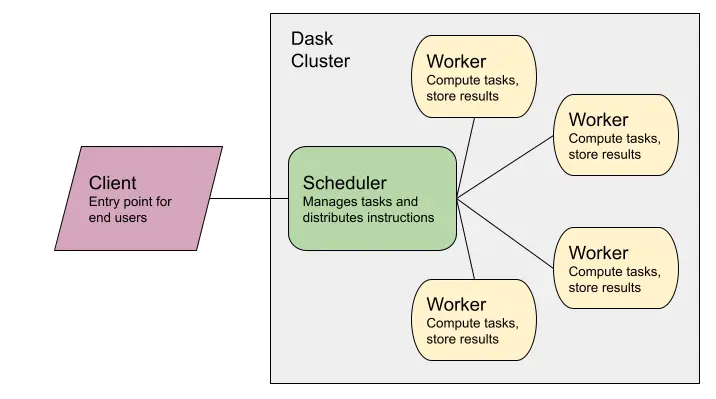

O **LocalCluster** permite que você distribua tarefas em vários núcleos ou CPUs disponíveis em sua máquina, melhorando assim a eficiência computacional em comparação com a execução sequencial. O cliente fornece uma interface para interagir com o cluster, permitindo que você monitore o progresso das tarefas e ajuste configurações conforme necessário.

## Explorando os datasets

In [ ]:
ROOT_DATA_PATH = "drive/MyDrive/Colab Notebooks/proc-dados-larga-escala/data/ml-25m"

In [ ]:
movies_df = dd.read_csv(f"{ROOT_DATA_PATH}/movies.csv")
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
tags_df = dd.read_csv(f"{ROOT_DATA_PATH}/tags.csv")
tags_df.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [ ]:
# Converter os valores da coluna 'timestamp' de epoch em segundos para datetime
tags_df['timestamp'] = dd.to_datetime(tags_df['timestamp'], unit='s')
tags_df.head()

,userId,movieId,tag,timestamp
0,3,260,classic,2015-08-13 13:25:55
1,3,260,sci-fi,2015-08-13 13:24:16
2,4,1732,dark comedy,2019-11-16 22:33:18
3,4,1732,great dialogue,2019-11-16 22:33:24
4,4,7569,so bad it's good,2019-11-16 22:30:55


In [ ]:
ratings_df = dd.read_csv(f"{ROOT_DATA_PATH}/ratings.csv")
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,296,5.000000,1147880044
1,1,306,3.500000,1147868817
2,1,307,5.000000,1147868828
3,1,665,5.000000,1147878820
4,1,899,3.500000,1147868510


In [ ]:
# Converter os valores da coluna 'timestamp' de epoch em segundos para datetime
ratings_df['timestamp'] = dd.to_datetime(ratings_df['timestamp'], unit='s')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,296,5.000000,2006-05-17 15:34:04
1,1,306,3.500000,2006-05-17 12:26:57
2,1,307,5.000000,2006-05-17 12:27:08
3,1,665,5.000000,2006-05-17 15:13:40
4,1,899,3.500000,2006-05-17 12:21:50


In [ ]:
dd.read_csv(f"{ROOT_DATA_PATH}/links.csv").head()

ValueError: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+--------+---------+----------+
| Column | Found   | Expected |
+--------+---------+----------+
| tmdbId | float64 | int64    |
+--------+---------+----------+

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'tmdbId': 'float64'}

to the call to `read_csv`/`read_table`.

Alternatively, provide `assume_missing=True` to interpret
all unspecified integer columns as floats.

In [ ]:
links_df = dd.read_csv(f"{ROOT_DATA_PATH}/links.csv", assume_missing=True)
links_df.head()

,movieId,imdbId,tmdbId
0,1.000000,114709.000000,862.000000
1,2.000000,113497.000000,8844.000000
2,3.000000,113228.000000,15602.000000
3,4.000000,114885.000000,31357.000000
4,5.000000,113041.000000,11862.000000


In [ ]:
# Existem 107 linhas com None na coluna tmdbId
links_df.isnull().sum().compute()

movieId      0
imdbId       0
tmdbId     107
dtype: int64

In [ ]:
# Existem filmes sem valor na coluna 'tmdbId', por esse motivo a coluna não pode ser do tipo int
links_df = dd.read_csv(
    f"{ROOT_DATA_PATH}/links.csv",
    dtype={
        'movieId': int,
        'imdbId': int
    },
    assume_missing=True
)
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.000000
1,2,113497,8844.000000
2,3,113228,15602.000000
3,4,114885,31357.000000
4,5,113041,11862.000000


In [ ]:
# Também é possível usar o Int64 do pandas que aceita None, nesse caso não precisa do assume_missing=True
# Referência -> https://pandas.pydata.org/docs/user_guide/integer_na.html
# IMPORTANTE: essa funcionalidade do Int64 é experimental e pode ter seu comportamento alterado sem aviso
links_df = dd.read_csv(
    f"{ROOT_DATA_PATH}/links.csv",
    dtype={
        'movieId': int,
        'imdbId': int,
        'tmdbId': 'Int64'
    }
)
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862
1,2,113497,8844
2,3,113228,15602
3,4,114885,31357
4,5,113041,11862


In [ ]:
links_df

,movieId,imdbId,tmdbId
npartitions=1,,,
,int64,int64,Int64
,...,...,...


In [ ]:
gtags_df = dd.read_csv(f"{ROOT_DATA_PATH}/genome-tags.csv")
gtags_df.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [ ]:
gscores_df = dd.read_csv(f"{ROOT_DATA_PATH}/genome-scores.csv")
gscores_df.head()

,movieId,tagId,relevance
0,1,1,0.028750
1,1,2,0.023750
2,1,3,0.062500
3,1,4,0.075750
4,1,5,0.140750


## Executando merge de dados

In [ ]:
# Calculando total de linhas
len(movies_df)

62423

In [ ]:
len(links_df)

62423

In [ ]:
# Criando operação de merge entre filmes e links
merged_df = dd.merge(movies_df, links_df, on='movieId', how='inner')
merged_df.head()

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357
4,5,Father of the Bride Part II (1995),Comedy,113041,11862


In [ ]:
len(merged_df)

62423

In [ ]:
# Uma forma alternativa de fazer merge seria utilizando um dos dataframes
#  O 'inner' significa que apenas as linhas com valores correspondentes
# em ambas as DataFrames serão incluídas no resultado final
movies_df = movies_df.merge(links_df, on='movieId', how='inner')
movies_df.head()

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357
4,5,Father of the Bride Part II (1995),Comedy,113041,11862


In [ ]:
len(movies_df)

62423

## Quais são os top 10 filmes mais avaliados?

In [ ]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,296,5.000000,2006-05-17 15:34:04
1,1,306,3.500000,2006-05-17 12:26:57
2,1,307,5.000000,2006-05-17 12:27:08
3,1,665,5.000000,2006-05-17 15:13:40
4,1,899,3.500000,2006-05-17 12:21:50


In [ ]:
ratings_df

,userId,movieId,rating,timestamp
npartitions=10,,,,
,int64,int64,float64,datetime64[ns]
,...,...,...,...
...,...,...,...,...
,...,...,...,...
,...,...,...,...


In [ ]:
%%time

len(ratings_df)

CPU times: user 380 ms, sys: 51.3 ms, total: 431 ms
Wall time: 8.67 s


25000095

In [ ]:
%%time

# Calcular os top 10 filmes com maior quantidade de avaliações
df = ratings_df.groupby('movieId')\
    ['rating']\
    .count()\
    .rename('ratings_count')\
    .nlargest(10)\
    .persist() # Salva o resultado na memória RAM dos workers Dask. Isso é feito usando persist() para otimizar o desempenho,
               # evitando a necessidade de recalcular o DataFrame quando ele for acessado posteriormente.

CPU times: user 16.5 ms, sys: 1.15 ms, total: 17.7 ms
Wall time: 18.3 ms


Esse resultado será salvo na memória RAM para otimizar futuras operações.

In [ ]:
%%time

df.max().compute() # Esse comando aguarda a célula anterior terminar

CPU times: user 253 ms, sys: 30.1 ms, total: 283 ms
Wall time: 5.2 s


81491

In [ ]:
%%time

df.max().compute() #  Uma vez persistido em RAM o mesmo comando é mais rápido

CPU times: user 9.94 ms, sys: 3.08 ms, total: 13 ms
Wall time: 21.2 ms


81491

In [ ]:
df.compute()

movieId
356     81491
318     81482
296     79672
593     74127
2571    72674
260     68717
480     64144
527     60411
110     59184
2959    58773
Name: ratings_count, dtype: int64

'*.compute()*' é um método em Dask que é utilizado para converter um DataFrame Dask em um DataFrame pandas, ou seja, **realiza a computação e traz os resultados para a memória local.** Em termos simples, a computação é efetivamente executada e o resultado é convertido para uma estrutura de dados que pode ser facilmente manipulada no Python usando a biblioteca pandas.
Isso pode ser útil quando você precisa realizar operações adicionais que não são suportadas diretamente
por Dask ou quando deseja trabalhar com os resultados em uma forma mais familiar do pandas.
No contexto de Dask, as operações não são executadas imediatamente, mas são adiadas até que você explicitamente peça para os resultados serem computados. Isso é feito para permitir o processamento paralelo e distribuído de grandes conjuntos de dados sem carregar todos os dados na memória de uma só vez.

OBS: *É importante notar que a chamada '.compute()' traz todos os resultados para a memória local. Se o conjunto de dados for muito grande, isso pode causar um aumento significativo no uso de memória, e você deve considerar se a computação local é viável para o seu caso específico.*

In [ ]:
movies_df[['movieId', 'title']].head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [ ]:
df.compute().reset_index()

,movieId,ratings_count
0,356,81491
1,318,81482
2,296,79672
3,593,74127
4,2571,72674
5,260,68717
6,480,64144
7,527,60411
8,110,59184
9,2959,58773


In [ ]:
# fazendo um 'merge()' para agregar os resultados de contagem das avaliações com os títulos dos filmes (contigos em movies_df)
df.compute()\
    .reset_index()\
    .merge(
        movies_df[['movieId', 'title']].compute(), # Atenção, essa linha pode estourar a memória do client
        on='movieId',
        how='inner'
    )\
    .set_index('movieId')

,ratings_count,title
movieId,,
356,81491,Forrest Gump (1994)
318,81482,"Shawshank Redemption, The (1994)"
296,79672,Pulp Fiction (1994)
593,74127,"Silence of the Lambs, The (1991)"
2571,72674,"Matrix, The (1999)"
260,68717,Star Wars: Episode IV - A New Hope (1977)
480,64144,Jurassic Park (1993)
527,60411,Schindler's List (1993)
110,59184,Braveheart (1995)


In [ ]:
# Solução alternativa mais segura porque o merge acontece de maneira distribuída
# Assim, somente o resultado final que terá 10 linhas será enviado para o client

df = movies_df[['movieId', 'title']].merge(
    df.compute().reset_index(),
    on='movieId',
    how='inner'   # garante que apenas os filmes presentes em ambos os DataFrames sejam incluídos no resultado ('df' possui apenas 10 valores).
).sort_values(by='ratings_count', ascending=False).compute()\
    .set_index('movieId') # O 'reset_index' do Dask Dataframe ordena os dados por padrão, criando um novo índice.
                          # Por isso usa-se o '.set_index('movieId')' do pandas para garantir que o índice seja
                          # definido sem alterar a ordem dos dados

df

,title,ratings_count
movieId,,
356,Forrest Gump (1994),81491
318,"Shawshank Redemption, The (1994)",81482
296,Pulp Fiction (1994),79672
593,"Silence of the Lambs, The (1991)",74127
2571,"Matrix, The (1999)",72674
260,Star Wars: Episode IV - A New Hope (1977),68717
480,Jurassic Park (1993),64144
527,Schindler's List (1993),60411
110,Braveheart (1995),59184


## Atividade Turma

### Quais são os top 10 filmes com maior total da soma das avaliações?

In [ ]:
%%time

df_task = ratings_df.groupby('movieId')\
    ['rating']\
    .sum()\
    .rename('ratings_sum')\
    .nlargest(10).persist()
df_task.compute()

CPU times: user 21.3 ms, sys: 1.17 ms, total: 22.4 ms
Wall time: 26 ms


movieId
318    359627.000000
296    333739.000000
356    329876.500000
593    307726.500000
2571   301895.000000
260    283127.000000
527    256600.500000
2959   248510.500000
1196   237711.000000
50     237207.500000
Name: ratings_sum, dtype: float64

In [ ]:
%%time

# Fazendo 'merge' com 'movies_df' que contem os títulos dos filmes
movies_df[['movieId', 'title']].merge(
    df_task.reset_index(),
    on='movieId',
    how='inner'
).sort_values(by='ratings_sum', ascending=False)\
    .compute()

CPU times: user 38 ms, sys: 890 µs, total: 38.8 ms
Wall time: 216 ms


,movieId,title,ratings_sum
3,318,"Shawshank Redemption, The (1994)",359627.000000
2,296,Pulp Fiction (1994),333739.000000
4,356,Forrest Gump (1994),329876.500000
6,593,"Silence of the Lambs, The (1991)",307726.500000
8,2571,"Matrix, The (1999)",301895.000000
1,260,Star Wars: Episode IV - A New Hope (1977),283127.000000
5,527,Schindler's List (1993),256600.500000
9,2959,Fight Club (1999),248510.500000
7,1196,Star Wars: Episode V - The Empire Strikes Back (1980),237711.000000
0,50,"Usual Suspects, The (1995)",237207.500000


## Qual é a quantidade de avaliações de cada valor de avaliação de cada um dos top 10 filmes mais avaliados?

In [ ]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,296,5.000000,2006-05-17 15:34:04
1,1,306,3.500000,2006-05-17 12:26:57
2,1,307,5.000000,2006-05-17 12:27:08
3,1,665,5.000000,2006-05-17 15:13:40
4,1,899,3.500000,2006-05-17 12:21:50


In [ ]:
df # dataset que contem os top 10 filmes com mais avaliações

,title,ratings_count
movieId,,
356,Forrest Gump (1994),81491
318,"Shawshank Redemption, The (1994)",81482
296,Pulp Fiction (1994),79672
593,"Silence of the Lambs, The (1991)",74127
2571,"Matrix, The (1999)",72674
260,Star Wars: Episode IV - A New Hope (1977),68717
480,Jurassic Park (1993),64144
527,Schindler's List (1993),60411
110,Braveheart (1995),59184


In [ ]:
df.index # obtendo os ID'S dos 10 filmes mais avaliados

Int64Index([356, 318, 296, 593, 2571, 260, 480, 527, 110, 2959], dtype='int64', name='movieId')

In [ ]:
len(ratings_df)

25000095

In [ ]:
len(ratings_df[ratings_df['movieId'].isin(df.index)]) # os top 10 filmes possuem um montante de 700675 avaliações

700675

In [ ]:
%%time

df = ratings_df[ratings_df['movieId'].isin(df.index)]\
    .groupby('movieId')\
    ['rating']\
    .value_counts()\
    .rename('ratings_value_count')\
    .reset_index()\
    .merge(df.reset_index(), on='movieId', how='inner')\
    .sort_values(by=['ratings_count', 'ratings_value_count'], ascending=False)\
    .compute()
df

CPU times: user 426 ms, sys: 61.7 ms, total: 487 ms
Wall time: 8.79 s


,movieId,rating,ratings_value_count,title,ratings_count
49,356,5.000000,25918,Forrest Gump (1994),81491
47,356,4.000000,23348,Forrest Gump (1994),81491
45,356,3.000000,10380,Forrest Gump (1994),81491
48,356,4.500000,9609,Forrest Gump (1994),81491
46,356,3.500000,6185,Forrest Gump (1994),81491
...,...,...,...,...,...
93,2959,2.000000,1188,Fight Club (1999),58773
94,2959,2.500000,940,Fight Club (1999),58773
91,2959,1.000000,617,Fight Club (1999),58773
90,2959,0.500000,340,Fight Club (1999),58773


In [ ]:
df[df['movieId'] == 356] # observando apenas as contagens do filme 356 (Forest Gump)

,movieId,rating,ratings_value_count,title,ratings_count
49,356,5.000000,25918,Forrest Gump (1994),81491
47,356,4.000000,23348,Forrest Gump (1994),81491
45,356,3.000000,10380,Forrest Gump (1994),81491
48,356,4.500000,9609,Forrest Gump (1994),81491
46,356,3.500000,6185,Forrest Gump (1994),81491
43,356,2.000000,2449,Forrest Gump (1994),81491
44,356,2.500000,1569,Forrest Gump (1994),81491
41,356,1.000000,1159,Forrest Gump (1994),81491
42,356,1.500000,450,Forrest Gump (1994),81491
40,356,0.500000,424,Forrest Gump (1994),81491


Ou seja, o filme Forest Gump possui 25.918 avaliações de valor 5, 23.348 avaliações de valor 4 e assim por diante.

### Fazendo uma visualização em gráficos de pizza

In [ ]:
df[df['movieId'] == 356]['title'].iloc[0]

'Forrest Gump (1994)'

In [ ]:
df['movieId'].unique()

array([ 356,  318,  296,  593, 2571,  260,  480,  527,  110, 2959])

In [ ]:
# 1: filtrando os filmes de ID 356
# 2: tornando a coluna 'rating' índice
# 3: selecionando do subconjunto do filme 356 a coluna 'ratings_value_count'
# 4: renomeando essa série com o título do filme de código 356 (Forest Gump)
df[df['movieId'] == 356]\
    .set_index('rating')\
    ['ratings_value_count']\
    .rename(df[df['movieId'] == 356]['title'].iloc[0])

rating
5.000000    25918
4.000000    23348
3.000000    10380
4.500000     9609
3.500000     6185
2.000000     2449
2.500000     1569
1.000000     1159
1.500000      450
0.500000      424
Name: Forrest Gump (1994), dtype: int64

Ploando gráficos de pizza pra cada ID de filme utilizando o método de código acima

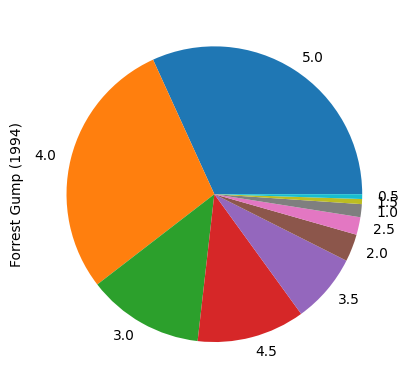

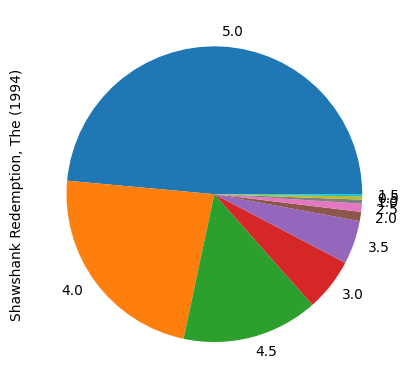

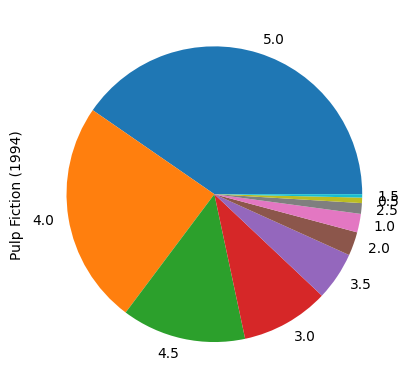

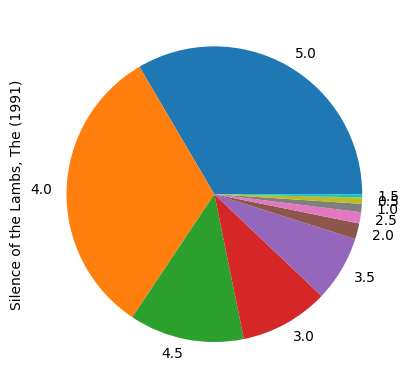

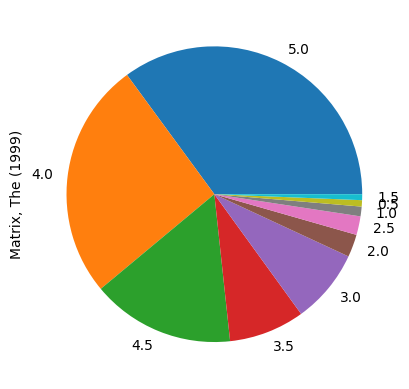

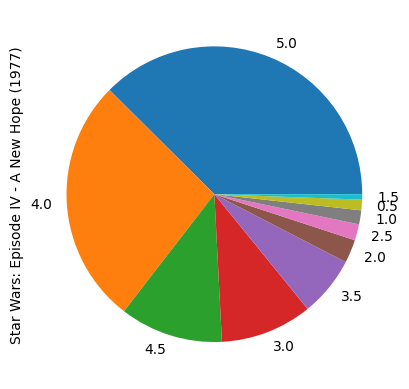

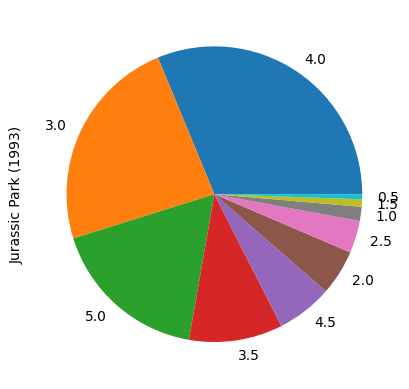

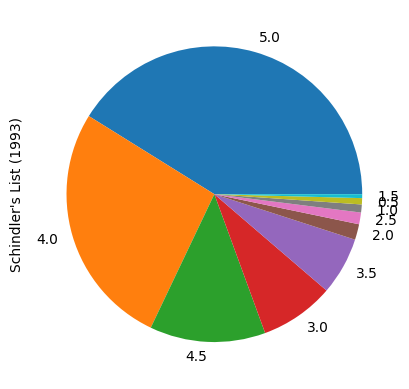

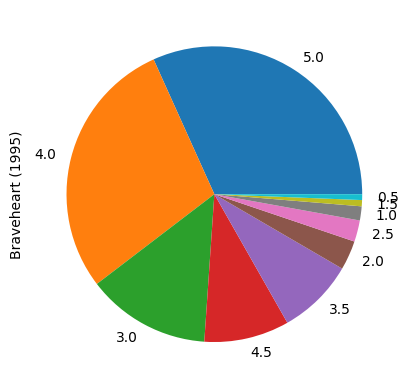

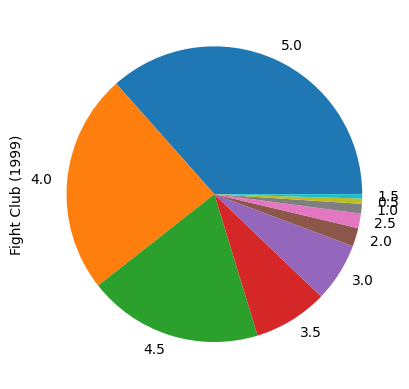

In [ ]:
import matplotlib.pyplot as plt

# Utilizar matplotlib como engine de gráficos porque na integração entre pandas e plotly não tem gráfico de pizza ainda
pd.options.plotting.backend = "matplotlib"

for movieId in df['movieId'].unique():
    plt.figure()
    df[df['movieId'] == movieId]\
        .set_index('rating')\
        ['ratings_value_count']\
        .rename(df[df['movieId'] == movieId]['title'].iloc[0])\
        .plot.pie()

## Atividade Turma

### Quais são os top 10 filmes com maior quantidade de avaliações com valor 5?

In [ ]:
ratings_df

,userId,movieId,rating,timestamp
npartitions=10,,,,
,int64,int64,float64,datetime64[ns]
,...,...,...,...
...,...,...,...,...
,...,...,...,...
,...,...,...,...


In [ ]:
# Filtrando os 10 com mais avaliações com nota 5
df_task = ratings_df[ratings_df['rating'] == 5]\
    .groupby('movieId')\
    ['rating']\
    .count()\
    .rename('count_rating_5')\
    .nlargest(10).persist()
df_task.compute()

movieId
318     39553
296     32169
356     25918
260     25804
2571    25482
527     24853
593     24801
858     24418
50      21585
2959    21486
Name: count_rating_5, dtype: int64

In [ ]:
# criando merge pra rastrear os titulos dos filmes através dos IDs
movies_df[['movieId', 'title']].merge(
    df_task.reset_index(),
    on='movieId',
    how='inner'
).sort_values(by='count_rating_5', ascending=False)\
    .compute()

,movieId,title,count_rating_5
3,318,"Shawshank Redemption, The (1994)",39553
2,296,Pulp Fiction (1994),32169
4,356,Forrest Gump (1994),25918
1,260,Star Wars: Episode IV - A New Hope (1977),25804
8,2571,"Matrix, The (1999)",25482
5,527,Schindler's List (1993),24853
6,593,"Silence of the Lambs, The (1991)",24801
7,858,"Godfather, The (1972)",24418
0,50,"Usual Suspects, The (1995)",21585
9,2959,Fight Club (1999),21486


## Quais são os top 10 filmes mais avaliados que são do gênero "Children"?

In [ ]:
movies_df = movies_df.persist() # Guardar merge de filmes com links na memória RAM do cluster
movies_df.head()

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357
4,5,Father of the Bride Part II (1995),Comedy,113041,11862


In [ ]:
len(movies_df)

62423

In [ ]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,296,5.000000,2006-05-17 15:34:04
1,1,306,3.500000,2006-05-17 12:26:57
2,1,307,5.000000,2006-05-17 12:27:08
3,1,665,5.000000,2006-05-17 15:13:40
4,1,899,3.500000,2006-05-17 12:21:50


In [ ]:
len(ratings_df)

25000095

In [ ]:
# Filtrar filmes que são do gênero Children
children_movies_df = movies_df[movies_df['genres'].str.contains("Children")]
len(children_movies_df)

2935

In [ ]:
# Filtrar avaliações dos filmes que são do gênero Children usando merge
children_movies_ratings_df = ratings_df.merge(children_movies_df, on='movieId', how='inner')
len(children_movies_ratings_df)

2124258

In [ ]:
children_movies_ratings_df.head()

,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId
0,1,2161,3.500000,2006-05-17 12:23:29,"NeverEnding Story, The (1984)",Adventure|Children|Fantasy,88323,34584
1,26,2161,3.500000,2010-07-30 18:13:43,"NeverEnding Story, The (1984)",Adventure|Children|Fantasy,88323,34584
2,60,2161,2.000000,1999-10-10 22:38:55,"NeverEnding Story, The (1984)",Adventure|Children|Fantasy,88323,34584
3,67,2161,5.000000,2000-12-01 09:19:07,"NeverEnding Story, The (1984)",Adventure|Children|Fantasy,88323,34584
4,72,2161,4.000000,2001-01-28 01:21:22,"NeverEnding Story, The (1984)",Adventure|Children|Fantasy,88323,34584


In [ ]:
%%time

# Calcular os top 10 filmes do gênero Children com maior quantidade de avaliações
df = children_movies_ratings_df['title']\
  .value_counts()\
  .nlargest(10)\
  .rename('ratings_count')\
  .compute()
df

CPU times: user 470 ms, sys: 61 ms, total: 531 ms
Wall time: 10.3 s


Toy Story (1995)                     57309
Aladdin (1992)                       43387
Lion King, The (1994)                42745
Shrek (2001)                         42303
Beauty and the Beast (1991)          35723
Finding Nemo (2003)                  34712
E.T. the Extra-Terrestrial (1982)    34602
Monsters, Inc. (2001)                34572
Babe (1995)                          31456
Incredibles, The (2004)              30562
Name: ratings_count, dtype: int64

In [ ]:
# Não utilizar matplotlib como engine de gráficos e usar plotly
pd.options.plotting.backend = "plotly"

# Criar uma visualização de gráfico de barras usando pandas e plotly
# Referência: https://pandas.pydata.org/docs/user_guide/visualization.html
df.plot(kind='bar')

## Quantos filmes cada gênero possui?

In [ ]:
movies_df.head()

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357
4,5,Father of the Bride Part II (1995),Comedy,113041,11862


In [ ]:
# Criar a coluna 'genres_list' com a lista de gêneros de cada filme
movies_df['genres_list'] = movies_df['genres'].str.split('|')
movies_df['genres_list'].head()

0    [Adventure, Animation, Children, Comedy, Fantasy]
1                       [Adventure, Children, Fantasy]
2                                    [Comedy, Romance]
3                             [Comedy, Drama, Romance]
4                                             [Comedy]
Name: genres_list, dtype: object

In [ ]:
# Criar uma linha para cada gênero de cada filme
genres_df = movies_df['genres_list'].explode()
genres_df.head(15)

0    Adventure
0    Animation
0     Children
0       Comedy
0      Fantasy
1    Adventure
1     Children
1      Fantasy
2       Comedy
2      Romance
3       Comedy
3        Drama
3      Romance
4       Comedy
5       Action
Name: genres_list, dtype: object

In [ ]:
len(movies_df)

62423

In [ ]:
# Calcular a quantidade de filmes por gênero e mostrar em um gráfico de barras
genres_df.value_counts()\
    .rename('movies_count')\
    .compute()\
    .plot(kind='bar')

## Atividade Turma

### Quais são as médias de avaliações de cada um dos 10 filmes mais avaliados do gênero Drama? Ordene crescente pelas médias.

In [ ]:
# filtrar filmes do gênero Drama
drama_movies_df = movies_df[movies_df['genres'].str.contains('Drama')]
len(drama_movies_df)

25606

In [ ]:
# merge dos filmes d egênero Drama com o dataset de avaliações
drama_movies_ratings_df = ratings_df.merge(drama_movies_df, on='movieId', how='inner')
len(drama_movies_ratings_df)

10962833

In [ ]:
drama_movies_ratings_df.head()

,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId,genres_list
0,1,296,5.000000,2006-05-17 15:34:04,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,110912,680,"[Comedy, Crime, Drama, Thriller]"
1,3,296,5.000000,2015-08-13 14:01:16,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,110912,680,"[Comedy, Crime, Drama, Thriller]"
2,4,296,4.000000,2019-11-16 21:14:58,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,110912,680,"[Comedy, Crime, Drama, Thriller]"
3,5,296,4.000000,1996-04-29 13:55:55,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,110912,680,"[Comedy, Crime, Drama, Thriller]"
4,7,296,4.000000,1996-06-22 11:58:50,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,110912,680,"[Comedy, Crime, Drama, Thriller]"


In [ ]:
%%time

# Calcular os top 10 filmes mais avaliados do gênero Drama
df_task = drama_movies_ratings_df.groupby('movieId')\
    ['movieId']\
    .count()\
    .rename('ratings_count')\
    .nlargest(10)\
    .persist()
df_task.compute()

CPU times: user 603 ms, sys: 57.1 ms, total: 660 ms
Wall time: 12.3 s


movieId
356     81491
318     81482
296     79672
527     60411
110     59184
2959    58773
2858    53689
858     52498
7153    50797
150     48377
Name: ratings_count, dtype: int64

 '*df_task.compute()*' dentro de *isin* é utilizada para garantir que os índices de 'df_task' estejam disponíveis na memória local antes de realizar a filtragem com *isin*

In [ ]:
%%time

# Calcular as médias das avaliações desses filmes ordenando crescente pelas médias
# '.reset_index()' para que a coluna 'title' usada no agrupamento não seja o índice
df_result = drama_movies_ratings_df[drama_movies_ratings_df['movieId'].isin(df_task.compute().index)]\
    .groupby('title')\
    ['rating']\
    .mean()\
    .rename('ratings_mean')\
    .reset_index()\
    .sort_values(by='ratings_mean')\
    .persist()

df_result.compute()

CPU times: user 658 ms, sys: 51 ms, total: 709 ms
Wall time: 12.5 s


,title,ratings_mean
1,Apollo 13 (1995),3.873556
2,Braveheart (1995),4.002273
4,Forrest Gump (1994),4.048011
6,"Lord of the Rings: The Return of the King, The (2003)",4.090340
0,American Beauty (1999),4.107340
7,Pulp Fiction (1994),4.188912
3,Fight Club (1999),4.228311
8,Schindler's List (1993),4.247579
5,"Godfather, The (1972)",4.324336
9,"Shawshank Redemption, The (1994)",4.413576


## Existe o mesmo gênero aparecendo mais de 1 vez na lista de gêneros do mesmo filme?

In [ ]:
# Criar um novo dataframe com a coluna 'movieId' como índice
movies_idx_df = movies_df.set_index('movieId')\
    .persist()

movies_idx_df.head()

,title,genres,imdbId,tmdbId,genres_list
movieId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862,"[Adventure, Animation, Children, Comedy, Fantasy]"
2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844,"[Adventure, Children, Fantasy]"
3,Grumpier Old Men (1995),Comedy|Romance,113228,15602,"[Comedy, Romance]"
4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357,"[Comedy, Drama, Romance]"
5,Father of the Bride Part II (1995),Comedy,113041,11862,[Comedy]


In [ ]:
# dataframe DASK
type(movies_idx_df)

dask.dataframe.core.DataFrame

In [ ]:
# oservando os tipos das colunas
movies_idx_df.dtypes

title          object
genres         object
imdbId          int64
tmdbId          Int64
genres_list    object
dtype: object

In [ ]:
# Criando o dataframe de gêneros com a coluna 'movieId' como índice. Obs: a coluna 'genres_list' é object
genres_df = movies_idx_df['genres_list'].explode()
genres_df.reset_index().dtypes

movieId         int64
genres_list    object
dtype: object

In [ ]:
genres_df.head()

movieId
1    Adventure
1    Animation
1     Children
1       Comedy
1      Fantasy
Name: genres_list, dtype: object

In [ ]:
# Tentar usar a função get_dummies com uma coluna ou Series do dask.dataframe que não seja do tipo category dá erro
genres_df = dd.get_dummies(genres_df)
genres_df.head(10)

NotImplementedError: `get_dummies` with non-categorical dtypes is not supported. Please use `df.categorize()` beforehand to convert to categorical dtype.

In [ ]:
# Tentar converter um Series do dask.dataframe para category dá erro, é necessário usar DataFrame do dask.dataframe
genres_df = genres_df.reset_index()\
    .categorize(columns=['genres_list'])
genres_df.dtypes

movieId           int64
genres_list    category
dtype: object

In [ ]:
genres_df.head(11)

,movieId,genres_list
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy
5,2,Adventure
6,2,Children
7,2,Fantasy
8,3,Comedy
9,3,Romance


Ou seja, o filme de 'movieId'= 1 possui os gêneros Adventure, Animation, Children, Comedy e Fantasy, o filme de 'movieId'=2 possui os gêneros Adventure, Children e Fantasy e assim por diante.

In [ ]:
# Gerar uma coluna para cada categoria com o valor 1 quando o filme possuir o gênero ou 0 caso não possuir
# Para melhorar os nomes das colunas criadas a coluna 'genres_list' está sendo renomeada para 'is_genre'
genres_df = dd.get_dummies(
    genres_df.rename(columns={'genres_list': 'is_genre'})
)
genres_df.head(11)

,movieId,is_genre_(no genres listed),is_genre_Action,is_genre_Adventure,is_genre_Animation,is_genre_Children,is_genre_Comedy,is_genre_Crime,is_genre_Documentary,is_genre_Drama,...,is_genre_Film-Noir,is_genre_Horror,is_genre_IMAX,is_genre_Musical,is_genre_Mystery,is_genre_Romance,is_genre_Sci-Fi,is_genre_Thriller,is_genre_War,is_genre_Western
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Para cada gênero único, é criado uma coluna respectiva.

In [ ]:
# Observando os tipos das colunas criadas
genres_df.dtypes

movieId                        int64
is_genre_(no genres listed)    uint8
is_genre_Action                uint8
is_genre_Adventure             uint8
is_genre_Animation             uint8
is_genre_Children              uint8
is_genre_Comedy                uint8
is_genre_Crime                 uint8
is_genre_Documentary           uint8
is_genre_Drama                 uint8
is_genre_Fantasy               uint8
is_genre_Film-Noir             uint8
is_genre_Horror                uint8
is_genre_IMAX                  uint8
is_genre_Musical               uint8
is_genre_Mystery               uint8
is_genre_Romance               uint8
is_genre_Sci-Fi                uint8
is_genre_Thriller              uint8
is_genre_War                   uint8
is_genre_Western               uint8
dtype: object

In [ ]:
# Somar os valores de todas as linhas das novas colunas agrupando por 'movieId'
genres_df = genres_df.groupby('movieId').sum()
genres_df.head()

,is_genre_(no genres listed),is_genre_Action,is_genre_Adventure,is_genre_Animation,is_genre_Children,is_genre_Comedy,is_genre_Crime,is_genre_Documentary,is_genre_Drama,is_genre_Fantasy,is_genre_Film-Noir,is_genre_Horror,is_genre_IMAX,is_genre_Musical,is_genre_Mystery,is_genre_Romance,is_genre_Sci-Fi,is_genre_Thriller,is_genre_War,is_genre_Western
movieId,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Caso alguma coluna 'is_genre...' possuir algum valor maior que 1, significa que existe gênero repetido para o ID do filme em questão

In [ ]:
# Não existe repetição de gênero na lista de gêneros dos filmes porque o valor máximo em todos os casos é 1
genres_df.max().compute()

is_genre_(no genres listed)    1
is_genre_Action                1
is_genre_Adventure             1
is_genre_Animation             1
is_genre_Children              1
is_genre_Comedy                1
is_genre_Crime                 1
is_genre_Documentary           1
is_genre_Drama                 1
is_genre_Fantasy               1
is_genre_Film-Noir             1
is_genre_Horror                1
is_genre_IMAX                  1
is_genre_Musical               1
is_genre_Mystery               1
is_genre_Romance               1
is_genre_Sci-Fi                1
is_genre_Thriller              1
is_genre_War                   1
is_genre_Western               1
dtype: uint8

In [ ]:
# Caso a lista de gêneros fosse muito grande, seria melhor comprovar isso usando describe
genres_df.max().describe().compute()

count         20
mean    1.000000
std     0.000000
min            1
25%     1.000000
50%     1.000000
75%     1.000000
max            1
dtype: object

Solução final num único bloco de código:

In [ ]:
%%time

# Solução final

genres_df = movies_idx_df['genres_list'].explode()
genres_df = genres_df.reset_index()\
    .categorize(columns=['genres_list'])
genres_df = dd.get_dummies(
    genres_df.rename(columns={'genres_list': 'is_genre'})
)
genres_df = genres_df.groupby('movieId').sum()
genres_df.max().describe().compute()

CPU times: user 99.1 ms, sys: 5.45 ms, total: 105 ms
Wall time: 307 ms


count         20
mean    1.000000
std     0.000000
min            1
25%     1.000000
50%     1.000000
75%     1.000000
max            1
dtype: object

#### Solução alternativa

In [ ]:
movies_idx_df['genres_list'].head()

movieId
1    [Adventure, Animation, Children, Comedy, Fantasy]
2                       [Adventure, Children, Fantasy]
3                                    [Comedy, Romance]
4                             [Comedy, Drama, Romance]
5                                             [Comedy]
Name: genres_list, dtype: object

In [ ]:
movies_idx_df['genres_list'].str.len().head()

movieId
1    5
2    3
3    2
4    3
5    1
Name: genres_list, dtype: int64

In [ ]:
len(set(['Adventure', 'Adventure', 'Children', 'Comedy', 'Fantasy']))

4

In [ ]:
set(['Adventure', 'Adventure', 'Children', 'Comedy', 'Fantasy'])

{'Adventure', 'Children', 'Comedy', 'Fantasy'}

In [ ]:
movies_idx_df['duplicated'] = movies_idx_df.apply(
    lambda x: len(set(x['genres_list'])) != len(x['genres_list']),
    axis='columns',
    meta=(None, 'object'))
movies_idx_df[['genres_list', 'duplicated']].head()

,genres_list,duplicated
movieId,,
1,"[Adventure, Animation, Children, Comedy, Fantasy]",False
2,"[Adventure, Children, Fantasy]",False
3,"[Comedy, Romance]",False
4,"[Comedy, Drama, Romance]",False
5,[Comedy],False


In [ ]:
%%time

# Solução alternativa final

movies_idx_df.apply(
    lambda x: len(set(x['genres_list'])) != len(x['genres_list']),
    axis='columns',
    meta=(None, 'object')
).unique().compute()

CPU times: user 52.4 ms, sys: 8.99 ms, total: 61.4 ms
Wall time: 892 ms


0    False
dtype: bool

## Qual é a estatística da variável 'relevance' do genoma de tag?

In [ ]:
gscores_df.head(15)

,movieId,tagId,relevance
0,1,1,0.028750
1,1,2,0.023750
2,1,3,0.062500
3,1,4,0.075750
4,1,5,0.140750
5,1,6,0.146750
6,1,7,0.063500
7,1,8,0.203750
8,1,9,0.202000
9,1,10,0.030750


In [ ]:
%%time

# Calcular a estatística dos valores da coluna 'relevance' usando a função describe
gscores_df['relevance'].describe().compute()

CPU times: user 449 ms, sys: 64.6 ms, total: 514 ms
Wall time: 8.13 s


count   15584448.000000
mean           0.116368
std            0.154472
min            0.000250
25%            0.025250
50%            0.061250
75%            0.151250
max            1.000000
Name: relevance, dtype: float64

Mínimo valor de relevância é 0.000250 e máximo valor é 1.

## Quais são as top 5 tags mais relevantes do filme 'Matrix, The (1999)' segundo o genoma de tags?

In [ ]:
gtags_df.head(15)

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
5,6,1950s
6,7,1960s
7,8,1970s
8,9,1980s
9,10,19th century


In [ ]:
len(gtags_df)

1128

In [ ]:
len(gscores_df)

15584448

Cada uma das 1128 tags irão possuir um valor de 'relevance' pra cada ID de filme na base de dados 'gscores_df'.

In [ ]:
# Fazer o merge entre os dados de score e tag do genoma de tags

tag_genome_df = dd.merge(gscores_df, gtags_df, on='tagId', how='inner')\
    .persist()
tag_genome_df.head()

,movieId,tagId,relevance,tag
0,1,1,0.028750,007
1,2,1,0.041250,007
2,3,1,0.046750,007
3,4,1,0.034250,007
4,5,1,0.043000,007


In [ ]:
len(tag_genome_df)

15584448

In [ ]:
# Fazer o merge desses dados com 'movieId' e 'title' do dataset de filmes

movies_tag_genome_df = tag_genome_df.merge(
    movies_df[['movieId', 'title']],
    on='movieId',
    how='inner'
)
movies_tag_genome_df.head()

,movieId,tagId,relevance,tag,title
0,1,1,0.028750,007,Toy Story (1995)
1,1,2,0.023750,007 (series),Toy Story (1995)
2,1,3,0.062500,18th century,Toy Story (1995)
3,1,4,0.075750,1920s,Toy Story (1995)
4,1,5,0.140750,1930s,Toy Story (1995)


In [ ]:
len(movies_tag_genome_df)

15584448

In [ ]:
# Calcular as top 5 tags mais relevantes segundo os dados do genoma de tags

movie_name = "Matrix, The (1999)"
movies_tag_genome_df[movies_tag_genome_df['title'] == movie_name]\
    .nlargest(5, columns='relevance')\
    .compute()

,movieId,tagId,relevance,tag,title
2595864,2571,337,0.995750,dystopic future,"Matrix, The (1999)"
2596417,2571,890,0.992750,scifi,"Matrix, The (1999)"
2595807,2571,280,0.991500,cyberpunk,"Matrix, The (1999)"
2596413,2571,886,0.988500,sci fi,"Matrix, The (1999)"
2596416,2571,889,0.987500,science fiction,"Matrix, The (1999)"


## Atividade Turma

### Quais são as top 5 tags mais relevantes segundo os dados do genoma de tags dos top 3 filmes mais avaliados?

In [ ]:
# Testando nlargest com groupby

ratings_df.head()

,userId,movieId,rating,timestamp
0,1,296,5.000000,2006-05-17 15:34:04
1,1,306,3.500000,2006-05-17 12:26:57
2,1,307,5.000000,2006-05-17 12:27:08
3,1,665,5.000000,2006-05-17 15:13:40
4,1,899,3.500000,2006-05-17 12:21:50


In [ ]:
ratings_df.nlargest(5, columns='timestamp').compute()

,userId,movieId,rating,timestamp
501058,85523,149406,4.500000,2019-11-21 09:15:03
1284464,8642,122914,4.000000,2019-11-21 09:12:29
501074,85523,204704,4.000000,2019-11-21 09:12:13
1284508,8642,202101,2.000000,2019-11-21 09:11:52
501061,85523,168252,4.000000,2019-11-21 09:11:19


In [ ]:
# DataFrameGroupBy não tem nlargest

ratings_df.groupby('movieId').nlargest(5, columns='timestamp').compute()

AttributeError: 'Column not found: nlargest'

In [ ]:
# Testando nlargest com groupby e apply

def top(d):
  return d.nlargest(5, columns='timestamp')

ratings_df.groupby('movieId')\
    .apply(top).head()

<ipython-input-226-f3c74f0f7f8c>:7: UserWarning:

`meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result



,userId,movieId,rating,timestamp
1501899,156357,3,4.000000,2019-11-11 02:30:45
1991001,30024,3,1.500000,2019-11-08 23:25:19
2178256,31154,3,2.500000,2019-11-07 23:47:57
408430,84925,3,3.500000,2019-11-06 05:47:44
1243522,25260,3,5.000000,2019-11-02 21:00:58


In [ ]:
# obtendo os 3 filmes com maior quantidade de avaliações
df_task = ratings_df['movieId']\
    .value_counts()\
    .rename('ratings_count')\
    .nlargest(3)\
    .compute()
df_task

356    81491
318    81482
296    79672
Name: ratings_count, dtype: int64

In [ ]:
# 1: Filtrando no dataset 'movies_tag_genome_df' os top 3 filmes mais avaliados presentes em 'df_task'
# 2: agrupando por 'movieId'. Agora, temos grupos de tags para cada filme.
# 3: Para cada grupo de tags associado a um filme, a função lambda é aplicada.
#    Para cada grupo de tags (d), seleciona as 5 linhas (tags) com os maiores valores na coluna 'relevance'.
#    Ou seja, são selecionadas as 5 tags mais relevantes para cada filme com base na coluna 'relevance'.

# OBS: O argumento 'meta' é utilizado para especificar os tipos de dados esperados nas colunas do resultado.
#      Isso é necessário ao usar operações que não são inferidas automaticamente pelo Dask.
movies_tag_genome_df[movies_tag_genome_df['movieId'].isin(df_task.index)]\
    .groupby('movieId')\
    .apply(
        lambda d: d.nlargest(5, columns='relevance'),
        meta={
            'movieId': numpy.dtype('int64'),
            'tagId': numpy.dtype('int64'),
            'relevance': numpy.dtype('float64'),
            'tag': numpy.dtype('O'),
            'title': numpy.dtype('O')
        }
    ).compute()

,movieId,tagId,relevance,tag,title
318605,296,510,0.999250,hit men,Pulp Fiction (1994)
318558,296,463,0.990500,gratuitous violence,Pulp Fiction (1994)
318384,296,289,0.984500,dark humor,Pulp Fiction (1994)
318729,296,634,0.983500,masterpiece,Pulp Fiction (1994)
318631,296,536,0.983250,imdb top 250,Pulp Fiction (1994)
385401,356,754,1.000000,oscar (best music - original score),Forrest Gump (1994)
385399,356,752,0.999750,oscar (best effects - visual effects),Forrest Gump (1994)
385403,356,756,0.991000,oscar (best picture),Forrest Gump (1994)
385398,356,751,0.982000,oscar (best editing),Forrest Gump (1994)
384946,356,299,0.976250,destiny,Forrest Gump (1994)
